In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.express as px
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

import utils

plt.rcParams["figure.figsize"] = (10,5)


d:\Repos\GitHub\maxis-intelligent-automation\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_PATH = "dataset"

In [3]:
df = pd.read_csv(os.path.join(DATASET_PATH, "ytd_churn_data.csv"))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


`SeniorCitizen` is also either "Yes" or "No" but the data is not consistent with other variables that are "Yes/No". Let's change this attribute to "Yes/No".

In [6]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploration

Problem statement: Given a customer profile, how likely is this customer to churn?

1. Univariate
2. Multivariate
3. Correlation

In [7]:
if not os.path.exists("Maxis-Customer-Churn.html"):
    pp = ProfileReport(df)
    pp.to_file("Maxis-Customer-Churn.html")

Surprisingly (and fortunately), there were no missing values in the dataset. Meanwhile `Churn` takes up around 26.5% of the dataset - this is an imbalanced dataset.

<AxesSubplot:xlabel='Churn', ylabel='count'>

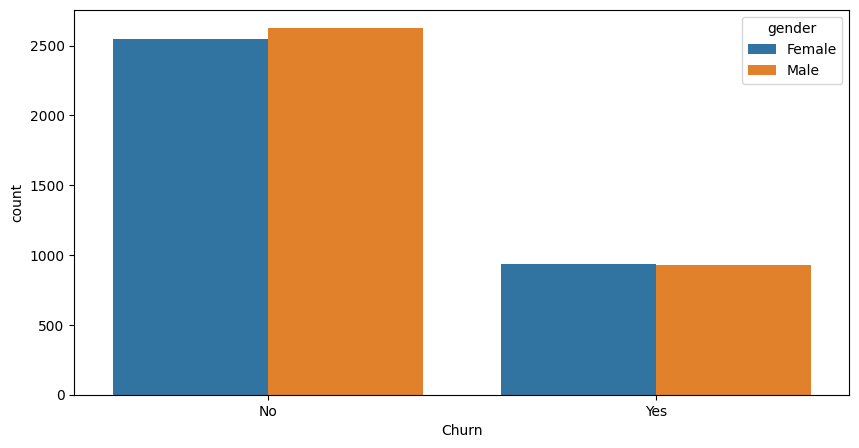

In [8]:
sns.countplot(df, x="Churn", hue="gender")

Based on the figure above, **the number of churn is equally distributed between male and female**.

<AxesSubplot:xlabel='Churn', ylabel='count'>

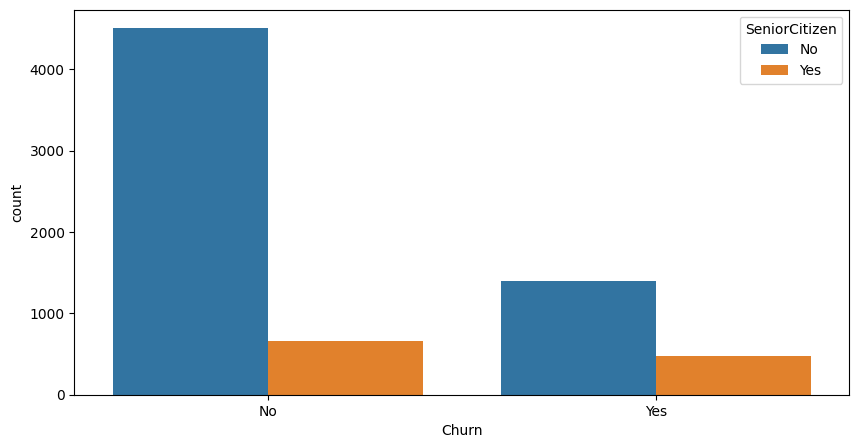

In [9]:
sns.countplot(df, x="Churn", hue="SeniorCitizen")

Based on figure above, **there were not much churn within senior citizen (~500, ~7%)**. This make sense as senior citizens thinks changing telco is too troublesome.

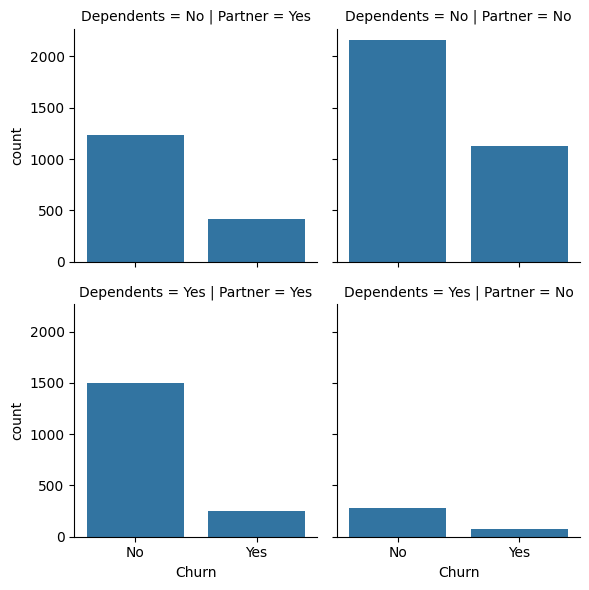

In [10]:
g = sns.FacetGrid(df, col="Partner", row="Dependents")
g.map_dataframe(sns.countplot, x="Churn")

Based on the figure above:
1. No family members (no partner and dependents): ~1k churn (~14%)
2. Have partner but no dependents: ~500 churn (~7%)
3. Have dependents but no partner: ~50 churn (~0.7%)
4. Have partner and dependents: ~250 churn (~3.5%)

It seems that **customer with no family members contributes to highest churn**, probably due to lowest social cost of unsubscribing (just need to find another telco to join for oneself, rather than the entire family).

<AxesSubplot:xlabel='tenure', ylabel='Count'>

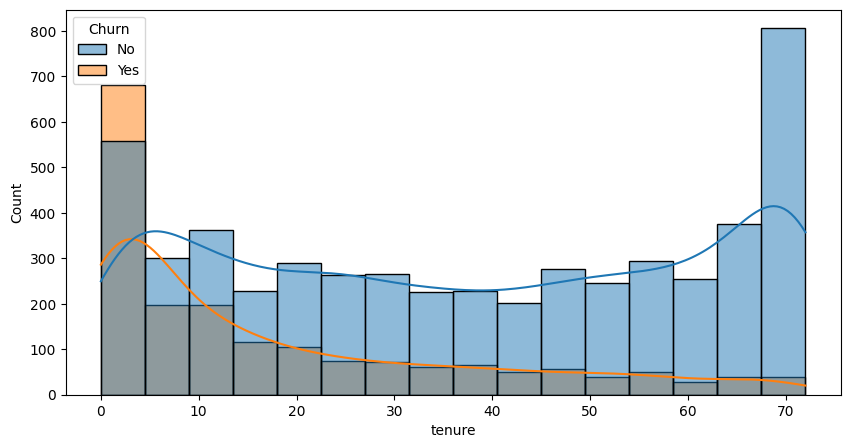

In [11]:
sns.histplot(df, x="tenure", hue="Churn", kde=True)

Based on the figure above, **the shorter the tenure, the more likely the customer will churn**.

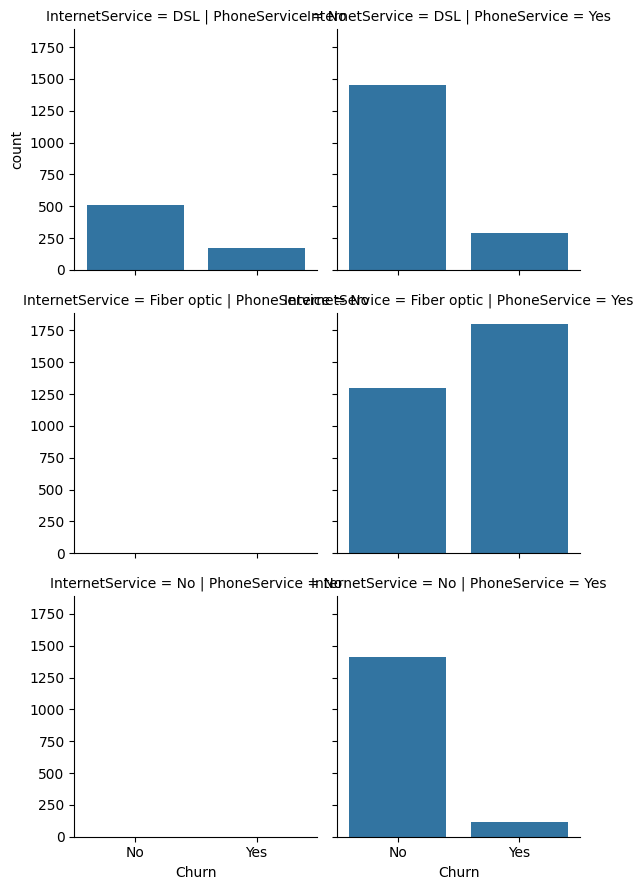

In [12]:
utils.make_countplot_facet_grid(df, "PhoneService", "InternetService", "Churn")

Based on figure above:
1. No internet service, no phone service: No churn
2. Fiber optic internet, no phone service: No churn (Maybe customers very satisfied with fiber optic?)
3. DSL internet, no phone service: ~100 churn
4. No internet service, got phone service: ~100 churn
5. Fiber optic internet, got phone service: ~1750 churn
6. DSL internet, got phone service: ~250 churn

- Customers who use the "fiber optic + phone service" package has highest churn. Probably the phone service that comes with the fiber optic is not that satisfactory.
- Also we observed that most of the churn comes from customers with phone service.

<AxesSubplot:xlabel='Churn', ylabel='count'>

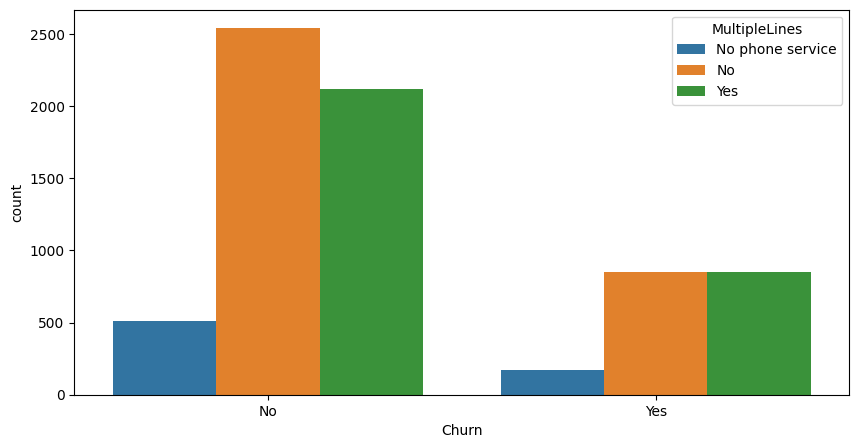

In [13]:
sns.countplot(df, x="Churn", hue="MultipleLines")

Based on the figure above:
1. The number of churn for multiple lines is similar to no multiple lines.
2. Interestingly, there were churn for someone who does not have a phone service -> Wrong data?

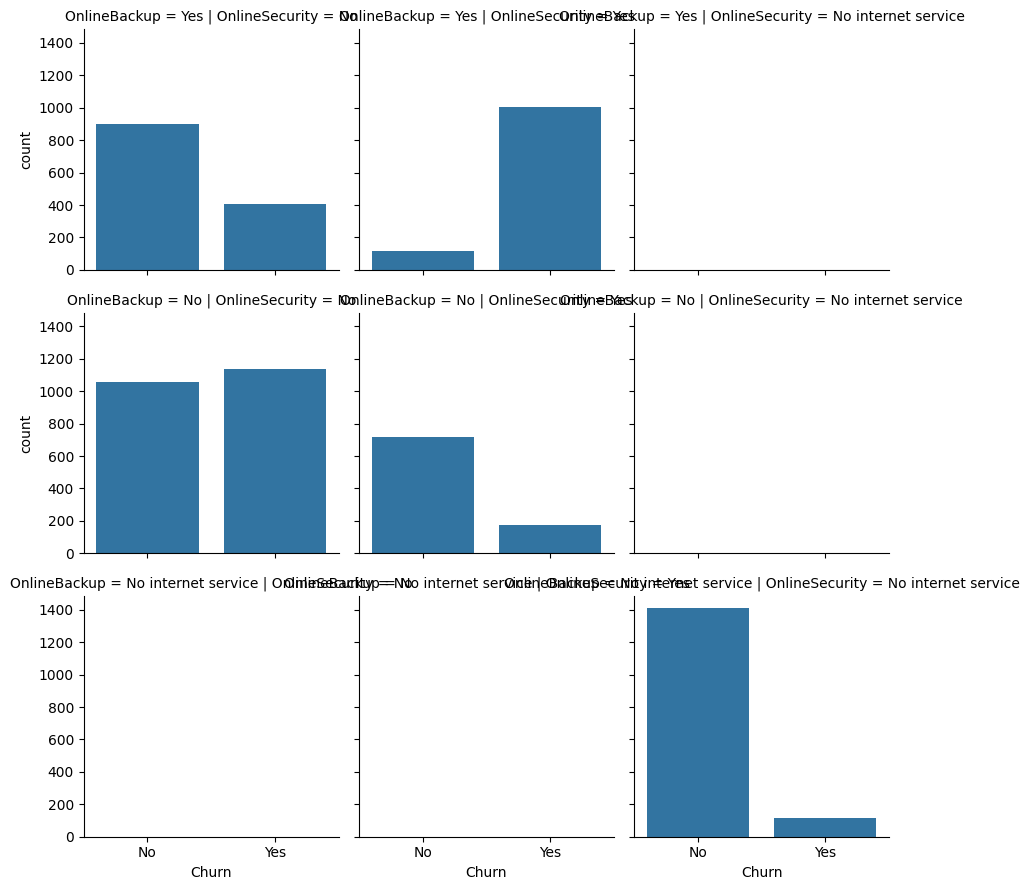

In [14]:
utils.make_countplot_facet_grid(df, "OnlineSecurity", "OnlineBackup", "Churn")

Based on figure above:
1. 

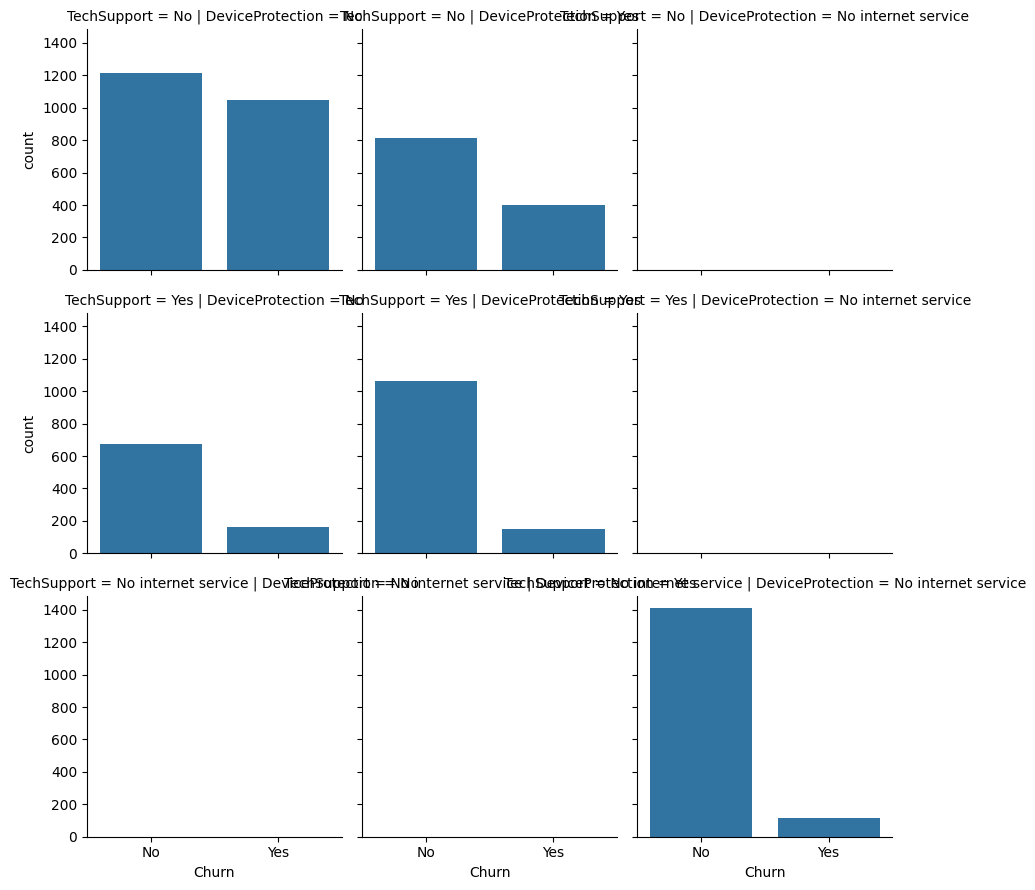

In [15]:
utils.make_countplot_facet_grid(df, "DeviceProtection", "TechSupport", "Churn")

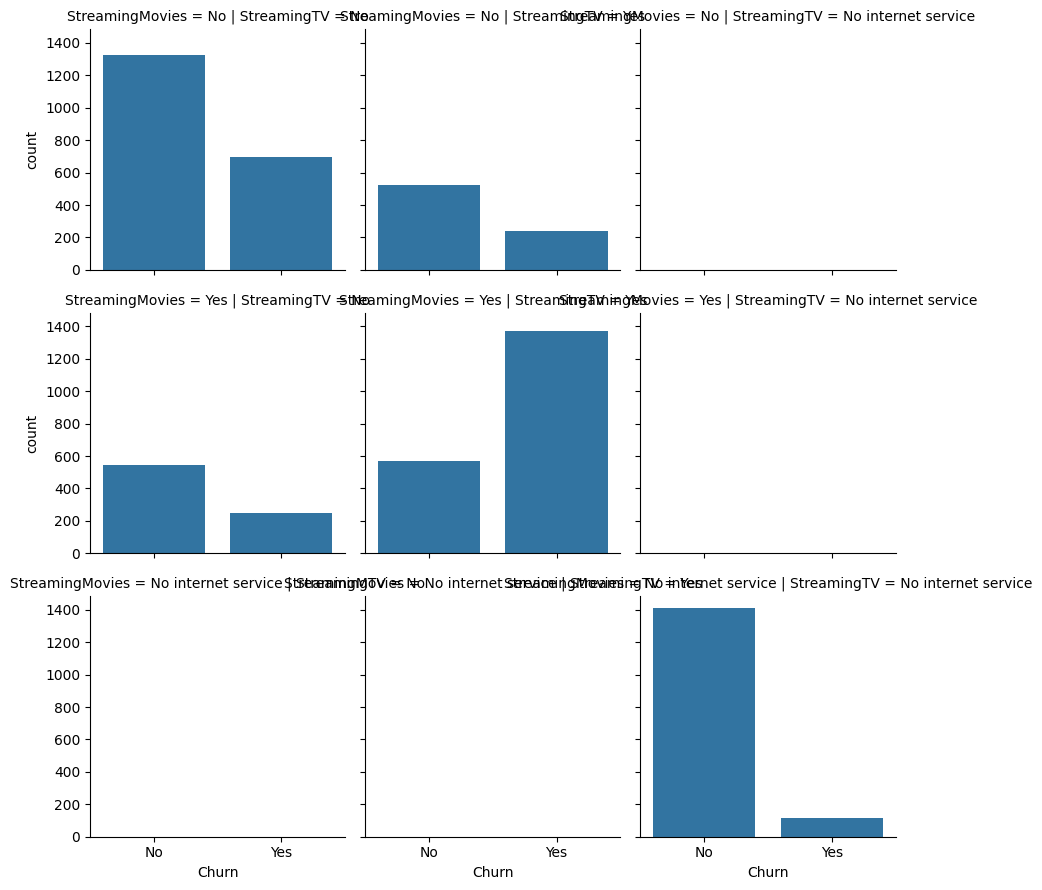

In [16]:
utils.make_countplot_facet_grid(df, "StreamingTV", "StreamingMovies", "Churn")

<AxesSubplot:xlabel='Churn', ylabel='count'>

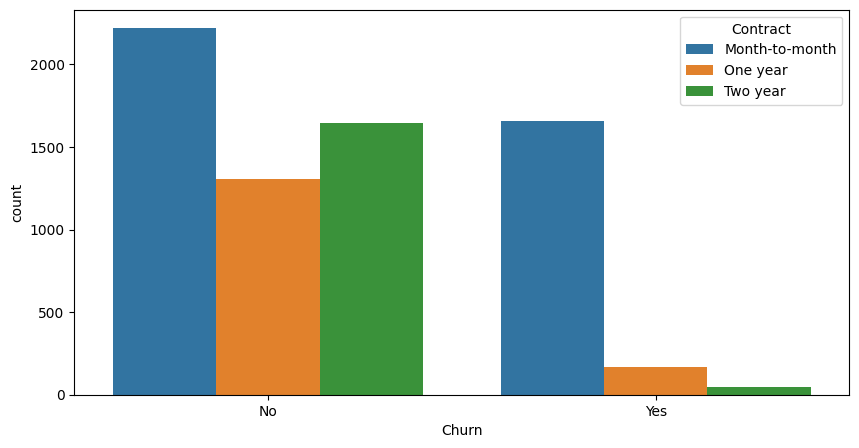

In [17]:
sns.countplot(df, x="Churn", hue="Contract")

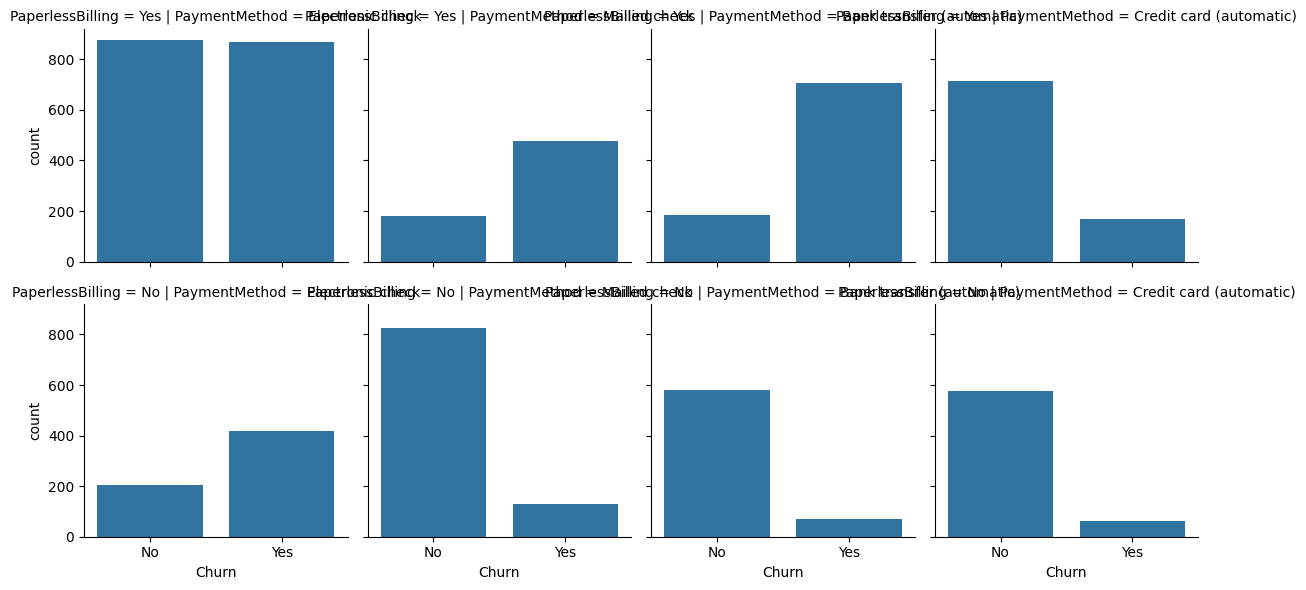

In [18]:
utils.make_countplot_facet_grid(df, "PaymentMethod", "PaperlessBilling", "Churn")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

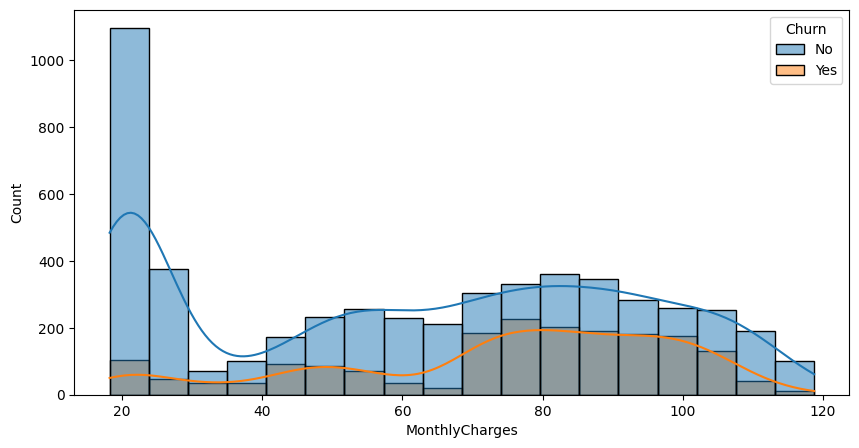

In [19]:
sns.histplot(df, x="MonthlyCharges", hue="Churn", kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

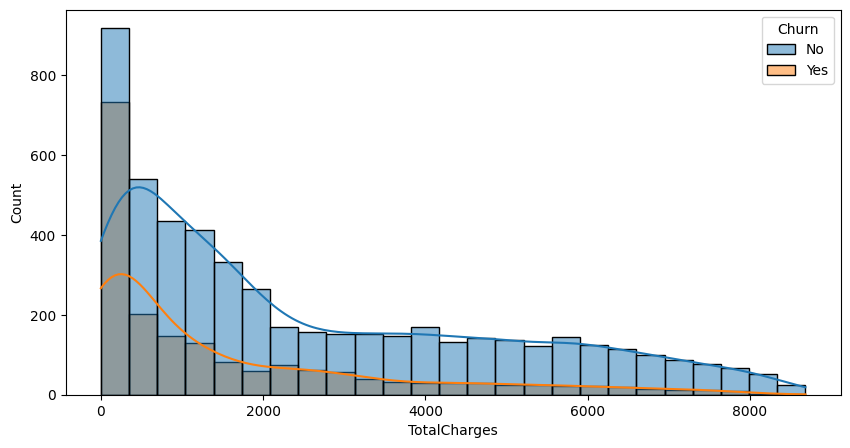

In [20]:
sns.histplot(df, x="TotalCharges", hue="Churn", kde=True)

In [24]:
from scipy.stats import pointbiserialr

def get_pointbiserial_value(array1: np.array, array2: np.array):
    return pointbiserialr(array1, array2)[0]

df[["tenure", "MonthlyCharges", "TotalCharges"]].corrwith(df["Churn"].apply(lambda x: 1 if x == "Yes" else 0), method=get_pointbiserial_value)

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
dtype: float64

In [22]:
cat_columns = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
       "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
       "PaymentMethod", "Churn"]

for col in cat_columns[:-1]:
    v = utils.compute_cramers_v(df, column1=col, column2=cat_columns[-1])
    print(col, v)

gender 0.0
SeniorCitizen 0.14999108255137
Partner 0.14966271044155077
Dependents 0.1634481432749282
PhoneService 0.0
MultipleLines 0.03639958908232507
InternetService 0.3220367323307425
OnlineSecurity 0.34701606688272874
OnlineBackup 0.291850036724674
DeviceProtection 0.28109492388964397
TechSupport 0.3425261587493695
StreamingTV 0.22990176915403474
StreamingMovies 0.23035147282444215
Contract 0.40979839182553446
PaperlessBilling 0.1911405817441778
PaymentMethod 0.3026771381187204


Attributes correlation wrt "Churn":
```
1. Contract         0.4097983
2. tenure           -0.352229
3. OnlineSecurity   0.3470160
4. TechSupport      0.3425261
5. InternetService  0.3220367
6. PaymentMethod    0.3026771
7. OnlineBackup     0.2918500
8. DeviceProtection 0.2810949
9. StreamingMovies  0.2303514
10. StreamingTV      0.2299017
11. TotalCharges     -0.198324
12. MonthlyCharges   0.193356
13. PaperlessBilling 0.1911405
14. Dependents       0.1634481
15. SeniorCitizen    0.1499910
16. Partner          0.1496627
17. MultipleLines    0.0363995
18. gender           0.0
19. PhoneService     0.0
```
From here, we can see that `gender`, `PhoneService` and `MultipleLines` has minimal correlation with `Churn`.

## Preprocessing

Before we perform transformation, we can remove some features:
1. `gender` and `PhoneService`: Zero correlation wrt `Churn`
2. `MultipleLines`: Low correlation (0.03) wrt `Churn`
3. `customerID`: Because it is not relevant

Then, we can transform the data:
1. `SeniorCitizen`: 2 unique values in text -> change to "0" and "1"
2. `Partner`: 2 unique values in text -> change to "0" and "1"
3. `Dependents`: 2 unique values in text -> change to "0" and "1"
4. `tenure`: continuous variable
5. `InternetService`: 3 unique values in text -> one hot encoding
6. `OnlineSecurity`: 3 unique values in text -> one hot encoding
7. `OnlineBackup`: 3 unique values in text -> one hot encoding
8. `DeviceProtection`: 3 unique values in text -> one hot encoding
9. `TechSupport`: 3 unique values in text -> one hot encoding
10. `StreamingTV`: 3 unique values in text -> one hot encoding
11. `StreamingMovies`: 3 unique values in text -> one hot encoding
12. `Contract`: 3 unique values in text -> one hot encoding
13. `PaperlessBilling`: 2 unique values in text -> change to "0" and "1"
14. `PaymentMethod`: 4 unique values in text -> one hot encoding
15. `MonthlyCharges`: continuous variable
16. `TotalCharges`: continuous variable
17. `Churn`: [Target variable] 2 unique values in text -> change to "0" and "1"

Hence we are left with 16 features (from 20 features) and 1 target variable.

Lastly, we can perform train test split with the instances randomly shuffled - 80% train (5,634 instances).

In [17]:
df2 = df.copy()

col_remove = ["gender", "PhoneService", "MultipleLines", "customerID"]
df2 = df2.drop(col_remove, axis=1)
df2

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
col_text2binary = ["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling", "Churn"]

for col in col_text2binary:
    df2[col] = df2[col].apply(lambda x: 1 if x == "Yes" else 0)

df2

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [45]:
from sklearn.preprocessing import OneHotEncoder
import pickle as pkl

col_text2onehot = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

enc = OneHotEncoder()
onehot_output = enc.fit_transform(df[col_text2onehot]).toarray()
onehot_output.shape

with open("models/onehotenc.pkl", "wb") as f:
    pkl.dump(enc, f)

In [43]:
df3 = pd.DataFrame(data=onehot_output, columns=enc.get_feature_names_out(col_text2onehot))

# Combine binary with one hot
df4 = pd.concat([df2[col_text2binary], df3], axis=1)
df4

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,1,1,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,1,1,1,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,1,1,1,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,1,1,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
X = df4.drop(columns="Churn", axis=1)
y = df4["Churn"]

print(X.shape, y.shape)

(7043, 32) (7043,)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 32) (5634,)
(1409, 32) (1409,)


In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

print(X_train.shape)
with open("models/scaler.pkl", "wb") as f:
    pkl.dump(scaler, f)

(5634, 32)


## Modelling

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

In [63]:
pipe_logr = Pipeline([("scaler", scaler), ("logr", LogisticRegression())])
pipe_logr.fit(X_train, y_train)
logr_score = pipe_logr.score(X_test, y_test)
print(logr_score)
y_pred = pipe_logr.predict(X_test)

with open("models/logr.pkl", "wb") as f:
    pkl.dump(pipe_logr, f)

0.7537260468417317


d:\Repos\GitHub\maxis-intelligent-automation\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
d:\Repos\GitHub\maxis-intelligent-automation\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [64]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.8104693140794224,
  'recall': 0.8676328502415459,
  'f1-score': 0.8380774615025663,
  'support': 1035},
 '1': {'precision': 0.5448504983388704,
  'recall': 0.4385026737967914,
  'f1-score': 0.48592592592592593,
  'support': 374},
 'accuracy': 0.7537260468417317,
 'macro avg': {'precision': 0.6776599062091464,
  'recall': 0.6530677620191687,
  'f1-score': 0.6620016937142461,
  'support': 1409},
 'weighted avg': {'precision': 0.7399643906678067,
  'recall': 0.7537260468417317,
  'f1-score': 0.7446035975524858,
  'support': 1409}}

In [70]:
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[898, 137],
       [210, 164]], dtype=int64)

From the confusion matrix above (1409 test instances):
- TP: 164
- FN: 137
- FP: 210
- TN: 164

Which means that the model failed to detect 137 customer churn (loss of revenue), and incorrectly flagged 210 customers who does not churn (wasted time/effort to keep them).

In [58]:
pipe_nb = Pipeline([("scaler", scaler), ("nb", CategoricalNB())])
pipe_nb.fit(X_train, y_train)
nb_score = pipe_nb.score(X_test, y_test)
print(nb_score)

if nb_score > logr_score:
    with open("models/nb.pkl", "wb") as f:
        pkl.dump(pipe_nb, f)

0.694819020581973


d:\Repos\GitHub\maxis-intelligent-automation\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
